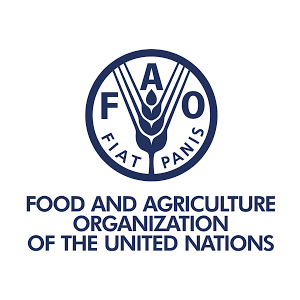


# <center> PANORAMA DE L'ETAT DE LA MALNUTRITION DANS LE MONDE </center>

## Data

**Importation et inspection des data**

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

### Importation des fichiers de données

In [136]:
dispo = pd.read_csv('dispo_alimentaire.csv')
print("Un fichier de disponibilité alimentaire pour l’année 2017 qui contient 17 variables : ")
print("Le pays, le produit, l\'origine du produit, 4 variables de disponibilité alimentaire et 10 variables relatives à la disponibilité intérieure")
dispo.head()

Un fichier de disponibilité alimentaire pour l’année 2017 qui contient 17 variables : 
Le pays, le produit, l'origine du produit, 4 variables de disponibilité alimentaire et 10 variables relatives à la disponibilité intérieure


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [138]:
# attention : 594 nan dans valeurs => pays non sous-alimentés
sousNut = pd.read_csv('sous_nutrition.csv') 
print("Un fichier d'insécurité alimentaire qui contient 3 variables : ")
print("Le pays, l'année, le nombre de personnes en millions d'habitants")
sousNut.head()

Un fichier d'insécurité alimentaire qui contient 3 variables : 
Le pays, l'année, le nombre de personnes en millions d'habitants


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [144]:
# pop/valeur en float > ??
# attention : la population et la sous-nutrition ne sont pas exprimées dans la même unité de valeur
pop = pd.read_csv('population.csv')   
print("Un fichier de population qui contient 3 variables : ")
print("Le pays, l'année, le nombre de personnes en milliers d'habitants")
pop.head()

Un fichier de population qui contient 3 variables : 
Le pays, l'année, le nombre de personnes en milliers d'habitants


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [139]:
aide = pd.read_csv('aide_alimentaire.csv')
print("Un fichier d'aide alimentaire qui contient 4 variables : ")
print("Le pays bénéficiaire, l'année, le produit, la quantité donnée en tonnes")
aide.head()

Un fichier d'aide alimentaire qui contient 4 variables : 
Le pays bénéficiaire, l'année, le produit, la quantité donnée en tonnes


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [146]:
## importation de la liste de pays par région
## 6 régions : Afrique, Amériques, Asie, Europe, Pacifique, Proche-orient
regions = pd.read_csv('liste totale des pays.csv', sep = ';')
print("Un fichier listant les pays par continent")
regions.head()

Un fichier listant les pays par continent


,zone,region
0,Afghanistan,Proche Orient
1,Afrique du Sud,Afrique
2,Albanie,Europe
3,Algérie,Afrique
4,Allemagne,Europe


In [148]:
## importation des data depuis le site de la FAO
## total par pays des céréales avec répartition Animaux / Humains
cereales = pd.read_csv('FAOSTAT_data_4-4-2022 (2).csv', sep = ',')
print("Un fichier relatif à l'utilisation des céréales")
cereales.head()

Un fichier relatif à l'utilisation des céréales


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,403,A,"Agrégat, peut inclure des données officielles,..."
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5142,Nourriture,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,6746,A,"Agrégat, peut inclure des données officielles,..."
2,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,5325,A,"Agrégat, peut inclure des données officielles,..."
3,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5142,Nourriture,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,10024,A,"Agrégat, peut inclure des données officielles,..."
4,FBS,Bilans Alimentaires (2010-),3,Albanie,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,455,A,"Agrégat, peut inclure des données officielles,..."


### Inspection et contrôle des données

In [145]:

# dispo.info()   # >> ok

# description
# aide.shape
# aide.describe()
# pop['Année'].unique()
# dispo["Zone"].nunique()    # donne le nb de lignes uniques



print("Inspection des données : info, shape, describe")


Inspection des données : info, shape, describe
Contrôle des données : doublon, valeurs incohérentes, nulles, formats
Vérification OK


In [ ]:
print("Contrôle des données : doublon, valeurs incohérentes, nulles, formats")
# vérification des NaN   >> ok juste dans sousNut, normal
# sousNut.isna().sum()    
    
# recherche des doublons dans chaque fichier  >> ok aucun
# aide.duplicated().sum()


In [151]:
# Identification de valeurs incohérentes dans le fichier SousNut
print("Fichier sousNut contient trois points à corriger :")

Fichier sousNut contient trois points à corriger :


In [153]:
print("premier point : il existe 20 Valeurs = '<0.1' >> comment les exploiter ?")
sousNut[(sousNut['Valeur']=='<0.1') & (sousNut['Année'] == '2016-2018')].value_counts()

# je les passe à 0 car impossible de les estimer
sousNut.loc[sousNut['Valeur']=='<0.1', 'Valeur'] = 0

# je remplace les champs valeur vides par 0
sousNut = sousNut.fillna(0)

print("Impossible à estimer, donc je les passe à 0, de même que les valeurs vides")

premier point : il existe 20 Valeurs = '<0.1' >> comment les exploiter ?
Impossible à estimer, donc je les passe à 0, de même que les valeurs vides


In [ ]:
print("Vérification OK")  

## Proportion de personnes en état de sous-nutrition en 2017

**mise en forme des données**

In [51]:
# premier point : il existe 20 Valeurs = '<0.1' >> comment les exploiter ?
sousNut[(sousNut['Valeur']=='<0.1') & (sousNut['Année'] == '2016-2018')].value_counts()

# je les passe à 0 car impossible de les estimer
sousNut.loc[sousNut['Valeur']=='<0.1', 'Valeur'] = 0

# je remplace les champs valeur vides par 0
sousNut = sousNut.fillna(0)


In [52]:
# deuxième point : le champ valeur de sousNut est un objet => le transformer en float
sousNut['Valeur'] = sousNut['Valeur'].astype(float)
print(sousNut.dtypes)

Zone       object
Année      object
Valeur    float64
dtype: object


In [53]:
# sélectionner les lignes 2016-2018 ET !0
totSN = sousNut[(sousNut['Valeur'] > 0)  & (sousNut['Année'] == '2016-2018')]
totSN

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
40,Angola,2016-2018,5.8
...,...,...,...
1126,Togo,2016-2018,1.6
1156,Turkménistan,2016-2018,0.2
1174,Ukraine,2016-2018,1.5
1192,Venezuela (République bolivarienne du),2016-2018,8.0


In [54]:
# troisième point : la population est exprimée en milliers d'habitants, 
# alors qu'il est exprimé en millions dans la table sousNut
# >> ramener la table sousNut (totSN) en milliers (* 1000)
totSN['Valeur'] = totSN['Valeur']*1000
totSN

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10500.0
10,Afrique du Sud,2016-2018,3100.0
16,Albanie,2016-2018,100.0
22,Algérie,2016-2018,1300.0
40,Angola,2016-2018,5800.0
...,...,...,...
1126,Togo,2016-2018,1600.0
1156,Turkménistan,2016-2018,200.0
1174,Ukraine,2016-2018,1500.0
1192,Venezuela (République bolivarienne du),2016-2018,8000.0


In [55]:
# on calcule le total de gens en sous nutrition
totpopSN = totSN['Valeur'].sum()
print("Le nombre total d'habitants en sous-alimentation en 2017, en milliers est de :", totpopSN)

Le nombre total d'habitants en sous-alimentation en 2017, en milliers est de : 535700.0


In [56]:
# on calcule le nombre total de la population de ces mêmes pays
# >> je crée une série contenant la liste des pays de totSN
# >> je sélectionne les valeurs des pays inclus dans cette série ET l'année 2017 et je totalise
# puis je calcule la proportion en pourcentage
# enfin, à titre de comparaison, je calcule cette proportion sur la population mondiale de 2017

In [57]:
listP = list(totSN['Zone'])
y = pop[(pop['Zone'].isin(listP)) & (pop['Année'] == 2017)]
totPopZ = y['Valeur'].sum()
p = round(totpopSN/totPopZ*100, 2)
totPopM = pop.loc[pop["Année"] == 2017 , ['Valeur']].sum()  ### TOTPOPM est une serie => totPopM = totPopM.iloc[0]
totPopM = totPopM.iloc[0]
m = round(totpopSN/totPopM*100, 2)
print("Le nombre total d'habitants de ces pays en 2017, en milliers est de :", totPopZ)
print('')
print('soit une proportion de : ' + str(p) + ' %')
print('')
print("La population mondiale en 2017, en milliers est de :", totPopM)
print('')
print('la proportion en % d\'habitants en sous-alimentation du total de la population mondiale de 2017 est de : ' , str(m) )


Le nombre total d'habitants de ces pays en 2017, en milliers est de : 4167953.741

soit une proportion de : 12.85 %

La population mondiale en 2017, en milliers est de : 7548134.1110000005

la proportion en % d'habitants en sous-alimentation du total de la population mondiale de 2017 est de :  7.1


<span style="color:red;font-size:2.6rem;font-weight:bold; ">RESULTATS QUESTION 1 SONT A PRESENTER SOUS FORME DE TABLEAU</span>

## Nombre théorique de personnes qui pourraient être nourries en 2017

Besoins journaliers moyen par habitant : 2075 kcal  
voir Annexe 1 du texte FAO : [Lien](https://www.fao.org/3/w0073f/w0073f26.htm)



### Calcul de la disponibilité alimentaire totale 

In [58]:
#Disponibilité alimentaire = disponibilité d'aliments en quantité et en qualité suffisante
# Kcal disponibles par pays : dispo * nb habitants par pays

a = pd.merge(dispo, pop, on = "Zone", how="left")
a.rename(columns = {'Valeur' : 'Population'}, inplace=True)
b = a.loc[a["Année"] == 2017 , ["Produit", "Année", "Zone", "Disponibilité alimentaire (Kcal/personne/jour)", "Population" ]]
# si je ne le mets pas dans un new df, alors colonne n'est pas conservée
b = b.assign(dispo_totale = b["Population"] * b["Disponibilité alimentaire (Kcal/personne/jour)"])

# dispo totale : 
dispoTot = b["dispo_totale"].sum()
print("la disponibilité alimentaire totale en Kcal/personne/ jour est de : ", dispoTot)




la disponibilité alimentaire totale en Kcal/personne/ jour est de :  20918984627.331


### Calcul du nombre de personnes nourrissables


In [59]:
# Nb Personnes nourrissables = Somme des Dispo en kcal/pers/jour / 2075
nbP = dispoTot/2075
print("le nombre théorique de personnes nourrissables est de : ", nbP)
x = round(nbP/totPopM*100, 2)
print("soit ", str(x), " % de la population mondiale")

le nombre théorique de personnes nourrissables est de :  10081438.37461735
soit  133.56  % de la population mondiale


<span style="color:red;font-size:2.6rem;font-weight:bold; ">faire une comparaison graphique par contient ou pays</span>

## Nombre théorique de personnes qui pourraient être nourries en 2017 à partir de produits végétaux


### Calcul de la disponibilité alimentaire des produits d'origine végétale

In [60]:
c = a.loc[(a["Année"] == 2017) & (a["Origine"]== "vegetale") , ["Origine","Produit", "Année", "Zone", "Disponibilité alimentaire (Kcal/personne/jour)", "Population" ]]
# si je ne le mets pas dans un new df, alors colonne n'est pas conservée
c = c.assign(dispo_totale = b["Population"] * b["Disponibilité alimentaire (Kcal/personne/jour)"])
c
# dispo totale végétal : 
dispoTotV = c["dispo_totale"].sum()
print("la disponibilité alimentaire totale en Kcal/personne/ jour est de : ", dispoTotV)

la disponibilité alimentaire totale en Kcal/personne/ jour est de :  17260764211.501


### Calcul du nombre de personnes nourrissables à partir de produits d'origine végétale

In [61]:
# Nb Personnes nourrissables = Somme des Dispo en kcal/pers/jour / 2075
nbPV = dispoTotV/2075
print("le nombre théorique de personnes nourrissables est de : ", nbPV)
x = round(nbPV/totPopM*100, 2)
print("soit ", str(x), " % de la population mondiale")

le nombre théorique de personnes nourrissables est de :  8318440.583855904
soit  110.21  % de la population mondiale


## Utilisation de la disponibilité intérieure

In [62]:
# La disponibilité intérieure est composée de : 
# Importations + Production +- Variation de stock - Exportations
# L'utilisation se mesure via : 
# Nourriture / Semences / Pertes / Traitement (ie Transformation alimentaire) / Alimentation animale / Autres utilisations


### Calcul par pays (tableau)

In [63]:
# regroupement par zones (select + groupby)
# NB : 174 rows car group est "devenu un index", donc démarre avec le titre
gb = dispo[["Zone","Nourriture", "Semences", "Pertes", "Traitement", "Aliments pour animaux", "Autres Utilisations", "Disponibilité intérieure"]]
gb = gb.groupby("Zone").sum()
gb

,Nourriture,Semences,Pertes,Traitement,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure
Zone,,,,,,,
Afghanistan,10735.0,395.0,1135.0,63.0,768.0,415.0,13515.0
Afrique du Sud,29812.0,253.0,2193.0,22819.0,5309.0,876.0,61256.0
Albanie,3476.0,55.0,276.0,113.0,660.0,174.0,4758.0
Algérie,31729.0,449.0,3753.0,637.0,4352.0,1707.0,42630.0
Allemagne,79238.0,1551.0,3781.0,39842.0,30209.0,7711.0,162275.0
...,...,...,...,...,...,...,...
Émirats arabes unis,6548.0,3.0,705.0,804.0,1174.0,2689.0,11850.0
Équateur,8574.0,138.0,707.0,6200.0,1200.0,1909.0,18614.0
États-Unis d'Amérique,320889.0,10403.0,7162.0,141010.0,148432.0,154699.0,777992.0


In [64]:
# ajout des colonnes des proportions calculées relatives à l'utilisation de la Dispo Intérieure
result = gb.assign(Part_Nourriture = round(gb["Nourriture"]/gb["Disponibilité intérieure"]*100, 2),
                     Part_Semences = round(gb["Semences"]/gb["Disponibilité intérieure"]*100, 2),
                     Part_Pertes = round(gb["Pertes"]/gb["Disponibilité intérieure"]*100, 2),
                     Part_Trt = round(gb["Traitement"]/gb["Disponibilité intérieure"]*100, 2),
                     Part_Alim_An = round(gb["Aliments pour animaux"]/gb["Disponibilité intérieure"]*100, 2),
                     Part_Autre_Ut = round(gb["Autres Utilisations"]/gb["Disponibilité intérieure"]*100, 2)
                    )
# result.drop(columns=["Nourriture", "Semences", "Pertes","Traitement","Aliments pour animaux", "Autres Utilisations"], inplace=True)

result[["Disponibilité intérieure","Part_Nourriture", "Part_Semences", "Part_Pertes", "Part_Trt", "Part_Alim_An", "Part_Autre_Ut"]]

,Disponibilité intérieure,Part_Nourriture,Part_Semences,Part_Pertes,Part_Trt,Part_Alim_An,Part_Autre_Ut
Zone,,,,,,,
Afghanistan,13515.0,79.43,2.92,8.40,0.47,5.68,3.07
Afrique du Sud,61256.0,48.67,0.41,3.58,37.25,8.67,1.43
Albanie,4758.0,73.06,1.16,5.80,2.37,13.87,3.66
Algérie,42630.0,74.43,1.05,8.80,1.49,10.21,4.00
Allemagne,162275.0,48.83,0.96,2.33,24.55,18.62,4.75
...,...,...,...,...,...,...,...
Émirats arabes unis,11850.0,55.26,0.03,5.95,6.78,9.91,22.69
Équateur,18614.0,46.06,0.74,3.80,33.31,6.45,10.26
États-Unis d'Amérique,777992.0,41.25,1.34,0.92,18.12,19.08,19.88


### Calcul par régions

voir Liste des pays par région : [Lien](https://www.fao.org/unfao/govbodies/gsbhome/council/council-election/fr/)


In [147]:
## importation de la liste de pays par région
## 6 régions : Afrique, Amériques, Asie, Europe, Pacifique, Proche-orient
regions

,zone,region
0,Afghanistan,Proche Orient
1,Afrique du Sud,Afrique
2,Albanie,Europe
3,Algérie,Afrique
4,Allemagne,Europe
...,...,...
169,Émirats arabes unis,Proche Orient
170,Équateur,Ameriques
171,États-Unis d'Amérique,Ameriques
172,Éthiopie,Afrique


In [66]:
## création colonne dans tableau result pour acccueillir la variable "Région" de type String
result["Region"] = ""
# result.dtypes
result[["Disponibilité intérieure","Part_Nourriture", "Part_Semences", "Part_Pertes", 
        "Part_Trt", "Part_Alim_An", "Part_Autre_Ut", "Region"]]

,Disponibilité intérieure,Part_Nourriture,Part_Semences,Part_Pertes,Part_Trt,Part_Alim_An,Part_Autre_Ut,Region
Zone,,,,,,,,
Afghanistan,13515.0,79.43,2.92,8.40,0.47,5.68,3.07,
Afrique du Sud,61256.0,48.67,0.41,3.58,37.25,8.67,1.43,
Albanie,4758.0,73.06,1.16,5.80,2.37,13.87,3.66,
Algérie,42630.0,74.43,1.05,8.80,1.49,10.21,4.00,
Allemagne,162275.0,48.83,0.96,2.33,24.55,18.62,4.75,
...,...,...,...,...,...,...,...,...
Émirats arabes unis,11850.0,55.26,0.03,5.95,6.78,9.91,22.69,
Équateur,18614.0,46.06,0.74,3.80,33.31,6.45,10.26,
États-Unis d'Amérique,777992.0,41.25,1.34,0.92,18.12,19.08,19.88,


In [67]:
# attribution de la région correspondante à chaque zone/pays
for i in range(len(regions)):
    if result.index[i] == regions.loc[i,'zone']:
        result.iloc[i,13] = regions.loc[i,'region']
        y = 0

    else:
        for y in range(len(regions)):
            if result.index[i] != regions.loc[y,'zone']:
                continue
            result.iloc[i,13] = regions.loc[y,'region']

            
result[["Disponibilité intérieure","Part_Nourriture", "Part_Semences", "Part_Pertes", "Part_Trt", "Part_Alim_An", "Part_Autre_Ut", "Region"]]


,Disponibilité intérieure,Part_Nourriture,Part_Semences,Part_Pertes,Part_Trt,Part_Alim_An,Part_Autre_Ut,Region
Zone,,,,,,,,
Afghanistan,13515.0,79.43,2.92,8.40,0.47,5.68,3.07,Proche Orient
Afrique du Sud,61256.0,48.67,0.41,3.58,37.25,8.67,1.43,Afrique
Albanie,4758.0,73.06,1.16,5.80,2.37,13.87,3.66,Europe
Algérie,42630.0,74.43,1.05,8.80,1.49,10.21,4.00,Afrique
Allemagne,162275.0,48.83,0.96,2.33,24.55,18.62,4.75,Europe
...,...,...,...,...,...,...,...,...
Émirats arabes unis,11850.0,55.26,0.03,5.95,6.78,9.91,22.69,Proche Orient
Équateur,18614.0,46.06,0.74,3.80,33.31,6.45,10.26,Ameriques
États-Unis d'Amérique,777992.0,41.25,1.34,0.92,18.12,19.08,19.88,Ameriques


In [68]:
# répartition de la distribution intérieure par région
gb2 = result[["Region","Disponibilité intérieure","Nourriture", "Semences", "Pertes", "Traitement", "Aliments pour animaux", "Autres Utilisations"]]
gb2 = gb2.groupby("Region").sum()
gb2["Part_Nourriture"] = round(gb2["Nourriture"]/gb2["Disponibilité intérieure"]*100,2)
gb2["Part_Semences"] = round(gb2["Semences"]/gb2["Disponibilité intérieure"]*100,2)
gb2["Part_Pertes"] = round(gb2["Pertes"]/gb2["Disponibilité intérieure"]*100,2)
gb2["Part_Trt"] = round(gb2["Traitement"]/gb2["Disponibilité intérieure"]*100,2)
gb2["Part_Alim_An"] = round(gb2["Aliments pour animaux"]/gb2["Disponibilité intérieure"]*100,2)
gb2["Part_Autre_Ut"] = round(gb2["Autres Utilisations"]/gb2["Disponibilité intérieure"]*100,2)
gb2[["Disponibilité intérieure","Part_Nourriture", "Part_Semences", "Part_Pertes", "Part_Trt", "Part_Alim_An", "Part_Autre_Ut"]]

,Disponibilité intérieure,Part_Nourriture,Part_Semences,Part_Pertes,Part_Trt,Part_Alim_An,Part_Autre_Ut
Region,,,,,,,
Afrique,937915.0,62.24,1.17,8.02,13.05,10.69,4.82
Ameriques,2580317.0,30.37,0.90,4.51,31.32,11.75,21.39
Asie,4412665.0,57.73,1.53,4.57,20.52,11.56,4.12
Europe,1616801.0,48.66,3.02,2.94,19.82,21.10,4.55
Pacifique,80197.0,34.29,1.48,1.19,42.31,13.81,6.97
Proche Orient,221099.0,66.62,1.37,5.31,6.34,17.51,3.14


### Calcul global (graphique)

## Utilisation des céréales

### Liste des céréales

In [149]:
## importation des data depuis le site de la FAO
## total par pays des céréales avec répartition Animaux / Humains
cereales

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,403,A,"Agrégat, peut inclure des données officielles,..."
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5142,Nourriture,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,6746,A,"Agrégat, peut inclure des données officielles,..."
2,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,5325,A,"Agrégat, peut inclure des données officielles,..."
3,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5142,Nourriture,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,10024,A,"Agrégat, peut inclure des données officielles,..."
4,FBS,Bilans Alimentaires (2010-),3,Albanie,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,455,A,"Agrégat, peut inclure des données officielles,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,FBS,Bilans Alimentaires (2010-),249,Yémen,5142,Nourriture,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,4546,A,"Agrégat, peut inclure des données officielles,..."
354,FBS,Bilans Alimentaires (2010-),251,Zambie,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,266,A,"Agrégat, peut inclure des données officielles,..."
355,FBS,Bilans Alimentaires (2010-),251,Zambie,5142,Nourriture,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,2455,A,"Agrégat, peut inclure des données officielles,..."
356,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,5521,Aliments pour animaux,2905,Cèrèales - Excl Bière,2017,2017,Milliers de tonnes,226,A,"Agrégat, peut inclure des données officielles,..."


### Répartition Hommes / Animaux

In [70]:
cereales.drop(columns=['Année','Description du Symbole','Code Produit', 'Code année', 'Code zone (FAO)','Code Élément', 'Code Domaine', 'Domaine', 'Produit', 'Unité', 'Symbole'], inplace=True)
cereales.rename(columns=  {"Valeur": 'Total en Milliers de tonnes', "Élément" : "Répartition"}, inplace = True) 
cereales


,Zone,Répartition,Total en Milliers de tonnes
0,Afghanistan,Aliments pour animaux,403
1,Afghanistan,Nourriture,6746
2,Afrique du Sud,Aliments pour animaux,5325
3,Afrique du Sud,Nourriture,10024
4,Albanie,Aliments pour animaux,455
...,...,...,...
353,Yémen,Nourriture,4546
354,Zambie,Aliments pour animaux,266
355,Zambie,Nourriture,2455
356,Zimbabwe,Aliments pour animaux,226


In [71]:
cereales2 = pd.pivot_table(cereales , index=['Zone','Répartition'])
print("Répartition de l'utilisation des céréales par pays en 2017")
print("")
print("Alimentation pour animaux / Alimentation humaine")

cereales2

Répartition de l'utilisation des céréales par pays en 2017

Alimentation pour animaux / Alimentation humaine


Total en Milliers de tonnes
Zone                  Répartition                                       
Afghanistan           Aliments pour animaux                          403
                      Nourriture                                    6746
Afrique du Sud        Aliments pour animaux                         5325
                      Nourriture                                   10024
Albanie               Aliments pour animaux                          455
...                                                                  ...
États-Unis d'Amérique Nourriture                                   35507
Éthiopie              Aliments pour animaux                         1153
                      Nourriture                                   19600
Îles Salomon          Aliments pour animaux                            7
                      Nourriture                                      76

[358 rows x 1 columns]

### Représentation graphique

In [72]:
px.histogram(cereales, x="Zone", y ="Total en Milliers de tonnes",color="Répartition", hover_name="Zone")

<span style="color:red;font-size:2.6rem;font-weight:bold; ">ajouter la colonnes region et faire facet <br>
faire un camembert du total</span>

## Etude de cas : le manioc en Thaïlande en 2017

### Le Manioc en Thaïlande en 2017

In [76]:
# Etude de la part du manioc dans la disponibilité alimentaire
th = dispo.loc[(dispo['Zone']=='Thaïlande')&(dispo['Produit'].str.contains("Manioc"))]
th

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


### Manioc et alimentation humaine en Thaïlande en 2017

#### Proportion de personnes en état de sous-nutrition


In [77]:
sousNutThai = sousNut.loc[(sousNut["Zone"] == 'Thaïlande') & (sousNut["Année"] == "2016-2018"), "Valeur"]
sousNutThai = sousNutThai.iloc[0]*1000

# ramené la population en millions d'habitants
popT = (pop.loc[(pop["Zone"] == 'Thaïlande') & (pop["Année"] == 2017), "Valeur"])
popT = popT.iloc[0]
ratioTT = round(sousNutThai/popT*100, 2)
ratioTM = round(sousNutThai/totPopM*100, 2)

print("Le nombre de personnes en état de sous-nutrition en Thaïlande en 2017 (en millions d'habitants) est de : ", str(sousNutThai))
print(" ")
print("soit ",str(ratioTT) , " % de la population du pays et ", str(ratioTM)," % de la population mondiale" )

Le nombre de personnes en état de sous-nutrition en Thaïlande en 2017 (en millions d'habitants) est de :  6200.0
 
soit  8.96  % de la population du pays et  0.08  % de la population mondiale


#### Nombre de personnes nourrissables

In [78]:
# Nb Personnes nourrissables = Somme des Dispo en kcal/pers/jour / 2075

nbPT = th["Disponibilité alimentaire (Kcal/personne/jour)"]/2075
nbPT = nbPT.iloc[0]
print("le nombre théorique de personnes nourrissables est de : ", nbPT)
x = round(nbPT/popT*100, 2)
print("soit ", str(x), " % de la population totale de la Thaïlande")

le nombre théorique de personnes nourrissables est de :  0.01927710843373494
soit  0.0  % de la population totale de la Thaïlande


### Etude de la disponibilité intérieure

#### Général


In [79]:
# La disponibilité intérieure est composée de : 
# Importations + Production +- Variation de stock - Exportations
# L'utilisation se mesure via : 
# Nourriture / Semences / Pertes / Traitement (ie Transformation alimentaire) / Alimentation animale / Autres utilisations

# il y a une valeur incorrecte : semence à NaN >> remplace par 0
th = th.fillna(0)
th

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


#### Utilisation

In [80]:
colors =['tomato', 'honeydew', 'lightsteelblue', 'mediumaquamarine', 'dodgerblue', 'oldlace']
fig = go.Figure(data=[go.Pie(labels=['Nourriture', 'Semences', 'Pertes', 'Traitement', 'Alimentation animale', 'Autres utilisations'], 
                            values=[th.iloc[0,12],th.iloc[0,15],th.iloc[0,13],th.iloc[0,16],th.iloc[0,3],th.iloc[0,4]])])
fig

fig.update_traces(hoverinfo='label+value', 
                  textfont_size=15, 
                  textinfo='label+percent', 
                  pull=[0.3, 0.1, 0.1, 0.1, 0.1, 0.1], # on décale les quartiers
                  marker=dict(
                     colors=colors, 
                     line=dict(color='#FFFFFF', width=2)
                            ))


#### Origines

In [81]:
colors =['tomato', 'honeydew', 'lightsteelblue', 'mediumaquamarine']
fig = go.Figure(data=[go.Pie(labels=['Exportations', 'Importations', 'Production', 'Variation de stock'], 
                            values=[th.iloc[0,10],th.iloc[0,11],th.iloc[0,14],th.iloc[0,17]])])
fig

fig.update_traces(hoverinfo='label+value', 
                  textfont_size=15, 
                  textinfo='label+value', 
                  pull=[0.1, 0.1, 0.1, 0.1], # on décale les quartiers
                  marker=dict(
                     colors=colors, 
                     line=dict(color='#FFFFFF', width=2)
                            ))


#### Focus sur les exportations et la production

La Thaïlande n'importe que 2.2% de son manioc (soit 1 250 milliers de tonnes).
Le stock est donc principalement assuré par la production nationale (soit 30 228 milliers de tonnes). 
Pourtant la disponibilité intérieure n'est que de 6 264 millers de tonnes. 
En effet, la Thaïlande exporte la plus grande partie de sa production, soit 25 240 milliers de tonnes.


### Conclusions

La Thaïlande est un pays qui souffre d'un taux de sous-nutrition élevé (8.96%).
Elle dispose pourtant de ressources qui pourraient servir à l'alimentation humaine, comme le manioc. 
Le manioc produit est quasiment exporté en totalité et une part infime de la population est nourrissable avec la disponibilité intérieure. Non seulement la part restante est faible (20 % - 6 264 milliers de tonnes ), mais la proportion attribuée à la nourriture n'est que de 13.9%.

## QUESTION DE MELANIE

### Top Ten des pays ayant reçu le plus d'aide depuis 2013

In [82]:
# Pays ayant reçu le plus d'aides depuis 2013 (soit de 2013 à 2016 inclus)

a13 = aide[aide["Année"]==2013]
a13 = a13.groupby('Pays bénéficiaire')["Valeur"].sum()
a13 = a13.sort_values(ascending=False).iloc[:10]
Pays_2013 = list(a13.index)
Aide_2013 = list(a13)
AideM_2013 = aide.loc[aide["Année"]==2013, 'Valeur'].sum()


a14 = aide[aide["Année"]==2014]
a14 = a14.groupby('Pays bénéficiaire')["Valeur"].sum()
a14 = a14.sort_values(ascending=False).iloc[:10]
Pays_2014 = list(a14.index)
Aide_2014 = list(a14)
AideM_2014 = aide.loc[aide["Année"]==2014, 'Valeur'].sum()

a15 = aide[aide["Année"]==2015]
a15 = a15.groupby('Pays bénéficiaire')["Valeur"].sum()
a15 = a15.sort_values(ascending=False).iloc[:10]
Pays_2015 = list(a15.index)
Aide_2015 = list(a15)
AideM_2015 = aide.loc[aide["Année"]==2015, 'Valeur'].sum()

a16 = aide[aide["Année"]==2016]
a16 = a16.groupby('Pays bénéficiaire')["Valeur"].sum()
a16 = a16.sort_values(ascending=False).iloc[:10]
Pays_2016 = list(a16.index)
Aide_2016 = list(a16)
AideM_2016 = aide.loc[aide["Année"]==2016, 'Valeur'].sum()


AideT = pd.DataFrame(list(zip(Pays_2013,Aide_2013,Aide_2013/AideM_2013*100,
                              Pays_2014,Aide_2014,Aide_2014/AideM_2014*100,
                              Pays_2015,Aide_2015,Aide_2015/AideM_2015*100,
                              Pays_2016,Aide_2016, Aide_2016/AideM_2016*100,)), 
                     columns = ['TopTen Pays 2013','Montant Aide 2013',"Ratio aide Mondiale 2013",
                                'TopTen Pays 2014','Montant Aide 2014',"Ratio aide Mondiale 2014",
                               'TopTen Pays 2015','Montant Aide 2015', "Ratio aide Mondiale 2015",
                                'TopTen Pays 2016','Montant Aide 2016', "Ratio aide Mondiale 2016"])

AideT.columns = pd.MultiIndex.from_tuples(
    zip(['2013','', "", '2014','',"", '2015','',"", '2016', '', ''], 
        AideT.columns))


AideT
                                           
                                                 

2013                    \
                   TopTen Pays 2013 Montant Aide 2013   
0                          Éthiopie            591404   
1         République arabe syrienne            563566   
2                            Soudan            330230   
3                             Yémen            264764   
4                             Kenya            220966   
5                     Soudan du Sud            196330   
6  République démocratique du Congo            150320   
7                           Somalie            139800   
8                        Bangladesh            131018   
9                       Afghanistan            128238   

                                                 2014                    \
  Ratio aide Mondiale 2013           TopTen Pays 2014 Montant Aide 2014   
0                14.197078  République arabe syrienne            651870   
1                13.528807                   Éthiopie            586624   
2                 7.927409              Soudan du Sud            450610   
3                 6.355850                     Soudan            321904   
4                 5.304448                      Kenya            217418   
5                 4.713043                 Bangladesh            194628   
6                 3.608540                   Pakistan            110268   
7                 3.356000                Philippines            105424   
8                 3.145181                      Yémen            103840   
9                 3.078445                      Tchad             97926   

                                                                  2015  \
  Ratio aide Mondiale 2014                            TopTen Pays 2015   
0                16.548486                   République arabe syrienne   
1                14.892139                                       Yémen   
2                11.439264                                    Éthiopie   
3                 8.171911                                       Kenya   
4                 5.519411                                       Tchad   
5                 4.940860                                     Somalie   
6                 2.799283  République populaire démocratique de Corée   
7                 2.676312            République démocratique du Congo   
8                 2.636100                                       Niger   
9                 2.485967                 République-Unie de Tanzanie   

                                                                   2016  \
  Montant Aide 2015 Ratio aide Mondiale 2015           TopTen Pays 2016   
0            524949                23.997592                      Yémen   
1            372306                17.019648  République arabe syrienne   
2            203266                 9.292130                      Niger   
3            114452                 5.232075                      Haïti   
4             73678                 3.368126                    Algérie   
5             71698                 3.277612              Côte d'Ivoire   
6             70506                 3.223121                   Colombie   
7             68048                 3.110756                   Honduras   
8             54656                 2.498552                      Libye   
9             52300                 2.390849                      Népal   

                                              
  Montant Aide 2016 Ratio aide Mondiale 2016  
0            465574                62.613507  
1            118558                15.944473  
2             92742                12.472565  
3             12462                 1.675973  
4              9476                 1.274396  
5              8786                 1.181600  
6              5466                 0.735104  
7              4492                 0.604114  
8              4414                 0.593624  
9              3484                 0.468552

In [83]:
# Moyenne des aides par pays sur les 4 ans 
Calc = pd.DataFrame(list(zip(Pays_2013 + Pays_2014 + Pays_2015 + Pays_2016,Aide_2013 +Aide_2014 + Aide_2015 + Aide_2016
                             )), 
                     columns = ['Pays','Montant Aide'])
Aide_par_pays = Calc.groupby('Pays')['Montant Aide'].sum().sort_values(ascending=False).iloc[:10]
Total_aide_mondiale = AideM_2013+AideM_2014+AideM_2015+AideM_2016
P = list(Aide_par_pays.index)
A = list(Aide_par_pays)
Aide = pd.DataFrame(list(zip(P, A, round(Aide_par_pays/Total_aide_mondiale*100,2)
                             )), 
                     columns = ['Pays','Montant Aide', 'Ratio Aide Mondiale'])
Aide

,Pays,Montant Aide,Ratio Aide Mondiale
0,République arabe syrienne,1858943,16.84
1,Éthiopie,1381294,12.52
2,Yémen,1206484,10.93
3,Soudan,652134,5.91
4,Soudan du Sud,646940,5.86
5,Kenya,552836,5.01
6,Bangladesh,325646,2.95
7,République démocratique du Congo,218368,1.98
8,Somalie,211498,1.92
9,Tchad,171604,1.55


In [84]:
fig = px.bar(Aide, y = 'Montant Aide', x='Pays', text='Montant Aide', color='Pays')
fig.show()

### Top ten des pays dont la proportion de personnes sous-alimentées est la plus forte en 2017

In [85]:
TopTen_SousNut_2017 = sousNut[sousNut['Année']=='2016-2018'].sort_values(by= ['Valeur'], ascending=False).iloc[:10]
TopTen_SousNut_2017['Valeur'] = TopTen_SousNut_2017['Valeur']
TopTen_SousNut_2017.rename(columns = {'Valeur' : 'NB Pers sous-alimentées en millions'}, inplace=True)
TopTen_SousNut_2017 =  TopTen_SousNut_2017.drop(columns="Année")
TopTen_SousNut_2017


,Zone,NB Pers sous-alimentées en millions
508,Inde,190.1
820,Pakistan,24.8
514,Indonésie,23.6
772,Nigéria,22.8
100,Bangladesh,21.5
370,Éthiopie,21.1
868,Philippines,15.7
952,République-Unie de Tanzanie,13.4
946,République populaire démocratique de Corée,12.0
580,Kenya,11.9


### Nb de personnes nourrissables dans les pays membres du Top Ten

In [87]:
print("Aide mondiale et disponibilité alimentaire du Top Ten des pays les plus aidés en 2017 ")

da = pd.merge(TopTen_SousNut_2017, dispo, on = "Zone", how="left")
da1 = da.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
da2 = pd.merge(TopTen_SousNut_2017, da1 , on = "Zone", how='left')
# da = da.drop(columns="Année")
DA_Aide = pd.merge(da2, pop, on = "Zone", how = "left")
DA_Aide

DA_Aide = DA_Aide[DA_Aide["Année"]==2017]
DA_Aide = DA_Aide.drop(columns="Année")
DA_Aide["Dispo Alim Totale"] = DA_Aide["Disponibilité alimentaire (Kcal/personne/jour)"]*DA_Aide["Valeur"]
DA_Aide= DA_Aide.drop(columns=["Disponibilité alimentaire (Kcal/personne/jour)"])
DA_Aide['Valeur'] = DA_Aide['Valeur']/1000
DA_Aide.rename(columns = {'Valeur' : 'Population totale en millions'}, inplace=True)
DA_Aide


Aide mondiale et disponibilité alimentaire du Top Ten des pays les plus aidés en 2017 


,Zone,NB Pers sous-alimentées en millions,Population totale en millions,Dispo Alim Totale
4,Inde,190.1,1338.676785,3.285113e+09
10,Pakistan,24.8,207.906209,5.068753e+08
16,Indonésie,23.6,264.650963,7.346711e+08
22,Nigéria,22.8,190.873244,5.153578e+08
28,Bangladesh,21.5,159.685424,3.917083e+08
34,Éthiopie,21.1,106.399924,2.265254e+08
40,Philippines,15.7,105.172925,2.700841e+08
46,République-Unie de Tanzanie,13.4,54.660339,1.204714e+08
52,République populaire démocratique de Corée,12.0,25.429825,5.322462e+07
58,Kenya,11.9,50.221142,1.107376e+08


In [88]:
# # Nb Personnes nourrissables = Somme des Dispo en kcal/pers/jour / 2075
print("Nombre de personnes nourrissables dans ce top ten : ")

DA_Aide["Nb de Personnes nourrissables en millions"] = DA_Aide["Dispo Alim Totale"]/2075/1000
DA_Aide


Nombre de personnes nourrissables dans ce top ten : 


,Zone,NB Pers sous-alimentées en millions,Population totale en millions,Dispo Alim Totale,Nb de Personnes nourrissables en millions
4,Inde,190.1,1338.676785,3.285113e+09,1583.186906
10,Pakistan,24.8,207.906209,5.068753e+08,244.277271
16,Indonésie,23.6,264.650963,7.346711e+08,354.058349
22,Nigéria,22.8,190.873244,5.153578e+08,248.365185
28,Bangladesh,21.5,159.685424,3.917083e+08,188.775106
34,Éthiopie,21.1,106.399924,2.265254e+08,109.168886
40,Philippines,15.7,105.172925,2.700841e+08,130.160998
46,République-Unie de Tanzanie,13.4,54.660339,1.204714e+08,58.058500
52,République populaire démocratique de Corée,12.0,25.429825,5.322462e+07,25.650421
58,Kenya,11.9,50.221142,1.107376e+08,53.367527


<AxesSubplot:ylabel='Zone'>

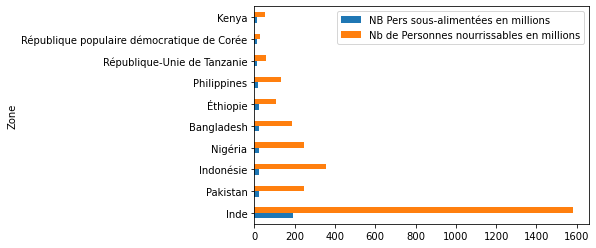

In [89]:
##### ATTENTION / DECOMMENTER SET INDEX A CHAQUE REPASSE
DA_Aide.set_index('Zone', inplace = True)
DA_Aide[["NB Pers sous-alimentées en millions", "Nb de Personnes nourrissables en millions"]].plot(rot=0, kind="barh")


### Disponibilité intérieure des pays membres du Top Ten

#### Composition de la disponibilité intérieure : 

In [90]:
Dint = da.groupby("Zone").sum()
DintS = Dint[["Disponibilité intérieure", "Importations - Quantité","Exportations - Quantité", "Production", "Variation de stock" ]]
print("Composition de la Disponibilité intérieure : ")
DintS




Composition de la Disponibilité intérieure : 


,Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock
Zone,,,,,
Bangladesh,72757.0,10013.0,328.0,68294.0,-5219.0
Inde,1100838.0,18954.0,40807.0,1126270.0,-3573.0
Indonésie,226930.0,23466.0,31912.0,238559.0,-3182.0
Kenya,31095.0,3060.0,1313.0,28950.0,398.0
Nigéria,192388.0,14510.0,748.0,179631.0,-999.0
Pakistan,168631.0,5561.0,9256.0,172886.0,-557.0
Philippines,108885.0,8778.0,7897.0,107049.0,966.0
République populaire démocratique de Corée,14876.0,993.0,83.0,13883.0,84.0
République-Unie de Tanzanie,38160.0,1871.0,1332.0,40849.0,-3221.0


#### Utilisation de la disponibilité intérieure : 

In [91]:
DintU = Dint[["Disponibilité intérieure", "Pertes", "Semences", "Nourriture", "Aliments pour animaux", "Traitement", "Autres Utilisations"]]
             
print("Utilisation de la Disponibilité intérieure : ")
DintU


Utilisation de la Disponibilité intérieure : 


,Disponibilité intérieure,Pertes,Semences,Nourriture,Aliments pour animaux,Traitement,Autres Utilisations
Zone,,,,,,,
Bangladesh,72757.0,4080.0,1332.0,57092.0,3335.0,4907.0,2015.0
Inde,1100838.0,55930.0,29432.0,619168.0,49129.0,332123.0,15162.0
Indonésie,226930.0,13081.0,1112.0,118914.0,9531.0,50365.0,34229.0
Kenya,31095.0,1444.0,232.0,23698.0,598.0,4819.0,432.0
Nigéria,192388.0,19854.0,994.0,114439.0,36023.0,4362.0,16718.0
Pakistan,168631.0,5897.0,8443.0,90495.0,4755.0,56028.0,3087.0
Philippines,108885.0,2901.0,1493.0,50213.0,6379.0,38549.0,9387.0
République populaire démocratique de Corée,14876.0,1066.0,194.0,11425.0,816.0,678.0,695.0
République-Unie de Tanzanie,38160.0,3236.0,573.0,27484.0,2084.0,4394.0,495.0


#### Décomposition import vs export

<AxesSubplot:ylabel='Zone'>

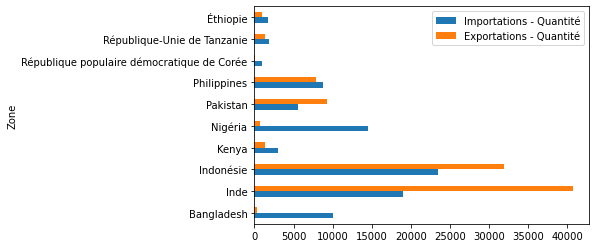

In [92]:
### ratio import/export
DintS[["Importations - Quantité","Exportations - Quantité"]].plot(rot=0, kind="barh")

#### Décomposition Nourriture humaine vs animale

<AxesSubplot:ylabel='Zone'>

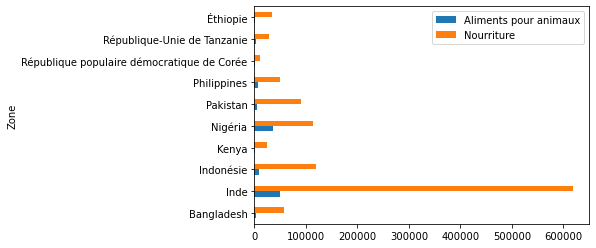

In [93]:
### Part homme/animal
DintU[["Aliments pour animaux", "Nourriture"]].plot(rot=0, kind="barh")



### Répartition géographique et évolution sur 4 ans (de 2013 à 2016)


#### sous nutrition par continent

In [117]:
# Mise en forme du fichier avec les noms de contients et les codes iso
sousNut_cont = sousNut
sousNut_cont['Région'] = ""
sousNut_cont['Iso']= ""
sousNut_cont.to_csv('sousNut_cont.csv', index=False)
sousNut_contT = pd.read_csv('sousNut_contT.csv', sep = ';')


# J'enlève les années 2017 et 2018 puisque le fichier aide ne contient pas de données pour ces deux années
sousNut_contTs= sousNut_contT[(sousNut_contT['Année']=='2012-2014')|(sousNut_contT['Année']=='2013-2015')
                                  |(sousNut_contT['Année']=='2014-2016')| (sousNut_contT['Année']=='2015-2017')]
sousNut_contTs

# graf par continent avec historique sur les 4 ans
px.histogram(sousNut_contTs, x="Année", y="Valeur", color="Région", facet_col="Région", title='Evolution de la sous-nutrition par continent :')

In [116]:
# Représentation graphique de la sous-nutrition : 

print("Répartition géographique de la sous-nutrition dans le monde en 2016 :")
sousNut_2017_cont = sousNut_contTs[sousNut_contTs['Année']=='2015-2017']
px.choropleth(sousNut_2017_cont, color="Valeur", locations="Iso", hover_name="Zone", range_color=(0,5), labels={'Valeur':'Sous-Nutrition en 2016'})



Répartition géographique de la sous-nutrition dans le monde en 2016 :


### Conclusions

une DA forte n'implique pas nécessairement une bonne nutrition (cf répartition homme/animal - import/export) : voir exemple du Bangladesh

On remarque sur la carte que la sous-nutrition touche quasiment exclusivement des pays de l'hémisphère sud avec une relative stabilité.
En effet, l'histogramme du point 7.5 montre que durant les 4 années étudiées, les taux d'aide par continent ont peu évolué.
(A la hausse, sauf pour ce qui est de l'Asie qui montre une évolution à la baisse).